In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, AveragePooling2D, BatchNormalization, Dropout

In [37]:
#Automatic train test split while loading data
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [38]:
#normalizing values of pixels
X_train = X_train/255
X_test = X_test/255

In [39]:
# LENET CNN architecture with batch normalization and dropout layer to reduce overfitting
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_6 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 batch_normalization_7 (Batc  (None, 8, 8, 16)         64        
 hNormalization)                                                 
                                                      

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [42]:
#training with 20 epochs
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 30s 18ms/step - loss: 0.3037 - accuracy: 0.9072 - val_loss: 0.0931 - val_accuracy: 0.9709
Epoch 2/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1101 - accuracy: 0.9679 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 3/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0820 - accuracy: 0.9770 - val_loss: 0.0568 - val_accuracy: 0.9836
Epoch 4/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0641 - accuracy: 0.9819 - val_loss: 0.0542 - val_accuracy: 0.9838
Epoch 5/20
1500/1500 [==============================] - 26s 18ms/step - loss: 0.0536 - accuracy: 0.9845 - val_loss: 0.0583 - val_accuracy: 0.9845
Epoch 6/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0483 - accuracy: 0.9859 - val_loss: 0.0510 - val_accuracy: 0.9867
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0542 -

In [43]:
y_prob = model.predict(X_test)

313/313 [==============================] - 8s 10ms/step


In [44]:
y_pred = y_prob.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.989

In [46]:
import matplotlib.pyplot as plt

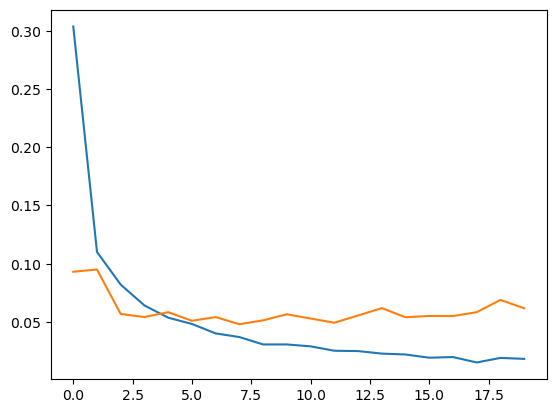

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

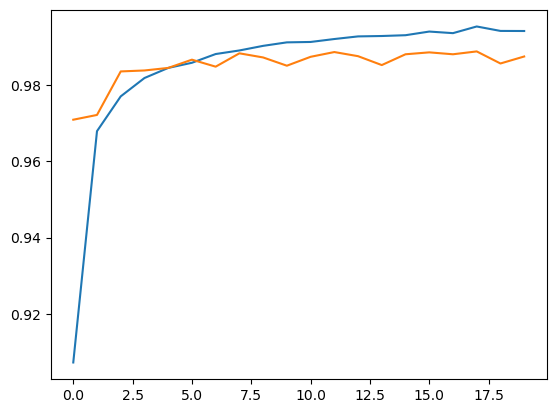

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

1/1 [==============================] - 0s 30ms/step


array([3], dtype=int64)

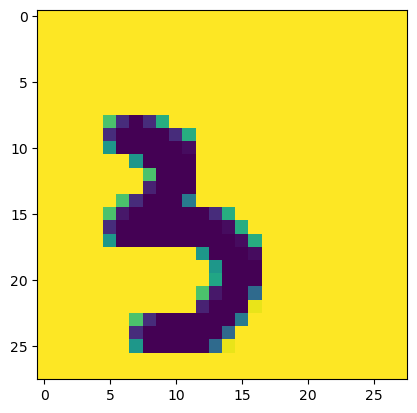

In [112]:
# loading our drawn image and preprocessing to use imageimport cv2
image = cv2.imread('images/6.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
image = cv2.resize(image, (28, 28))
image = image.astype('float32') / 255.0
image = image.reshape((1, 28, 28))
model.predict(image).argmax(axis=1)

In [113]:
model.predict(image).argmax(axis=1)

1/1 [==============================] - 0s 50ms/step


array([3], dtype=int64)

In [114]:
# from tensorflow.keras.models import load_model

In [91]:
# model.save('models/digitRecognition.h5')